In [7]:
import os
import pandas as pd

# Folder path where the monthly CSV files are stored
base_path = "D:/CSV_files"  # Update this path as needed

# Initialize an empty DataFrame to store all data
all_data = pd.DataFrame()

# Iterate over the monthly folders
for month_folder in os.listdir(base_path):
    month_path = os.path.join(base_path, month_folder)
    
    if os.path.isdir(month_path):  # Ensure it's a directory (not a file)
        print(f"Processing folder: {month_folder}")
        
        # Iterate over the daily CSV files in each month's folder
        for daily_file in os.listdir(month_path):
            daily_file_path = os.path.join(month_path, daily_file)
            
            if daily_file.endswith(".csv"):  # Only process CSV files
                try:
                    # Read the daily CSV file into a DataFrame
                    daily_df = pd.read_csv(daily_file_path)

                    # Extract the date from the filename (assuming the format is YYYY-MM-DD_HH-MM-SS.csv)
                    date = daily_file.split("_")[0]  # Extract the date part of the filename
                    daily_df["Date"] = date  # Add date column to DataFrame

                    # Append the daily DataFrame to the combined DataFrame
                    all_data = pd.concat([all_data, daily_df], ignore_index=True)
                
                except Exception as e:
                    print(f"Error reading file {daily_file}: {e}")

# Save the combined data into a CSV file
output_path = "D:/combined_stock_data.csv"  # Update the output path as needed
all_data.to_csv(output_path, index=False)
print(f"All data combined and saved to {output_path}")


Processing folder: 2023-10
Processing folder: 2023-11
Processing folder: 2023-12
Processing folder: 2024-01
Processing folder: 2024-02
Processing folder: 2024-03
Processing folder: 2024-04
Processing folder: 2024-05
Processing folder: 2024-06
Processing folder: 2024-07
Processing folder: 2024-08
Processing folder: 2024-09
Processing folder: 2024-10
Processing folder: 2024-11
All data combined and saved to D:/combined_stock_data.csv


In [15]:
df = pd.read_csv("D:/Project_Stock/combined_stock_data.csv")
df

,Ticker,close,date,high,low,month,open,volume,Date
0,SBIN,602.95,2023-10-03 05:30:00,604.9,589.60,2023-10,596.60,15322196,2023-10-03
1,BAJFINANCE,7967.60,2023-10-03 05:30:00,7975.5,7755.00,2023-10,7780.80,944555,2023-10-03
2,TITAN,3196.25,2023-10-03 05:30:00,3212.5,3114.40,2023-10,3148.80,1007308,2023-10-03
3,ITC,439.75,2023-10-03 05:30:00,442.9,439.25,2023-10,441.00,7481883,2023-10-03
4,TCS,3513.85,2023-10-03 05:30:00,3534.2,3480.10,2023-10,3534.20,1948148,2023-10-03
...,...,...,...,...,...,...,...,...,...
14195,HINDALCO,652.10,2024-11-22 05:30:00,657.3,647.40,2024-11,652.95,3586402,2024-11-22
14196,HEROMOTOCO,4794.10,2024-11-22 05:30:00,4808.4,4742.00,2024-11,4778.40,394712,2024-11-22
14197,AXISBANK,1142.40,2024-11-22 05:30:00,1147.9,1127.55,2024-11,1136.65,16687505,2024-11-22
14198,HDFCBANK,1745.60,2024-11-22 05:30:00,1754.3,1729.55,2024-11,1743.55,12386806,2024-11-22


In [30]:
import pandas as pd

# Assuming df is your DataFrame containing the stock data

# List the columns with numeric data (for example: 'close', 'volume', etc.)
numeric_columns = ['close', 'high', 'low', 'open', 'volume']  # Adjust column names based on your dataset

# Exclude non-numeric columns like 'Ticker', 'Date', etc.
df_numeric = df[numeric_columns]

# Calculate mean for numeric columns (ignoring 'Ticker' and non-numeric columns)
mean_values = df_numeric.mean()  # This will calculate the mean for each numeric column

# Handle missing values by filling NaNs with the mean values
df_filled = df.fillna(mean_values)

# Check if missing values are filled
print(df_filled.isnull().sum())

# Optionally, save the cleaned DataFrame back to CSV
df_filled.to_csv("D:/Project_Stock/cleaned_stock_data.csv", index=False)


# Check the cleaned DataFrame
print(df_filled.head())


Ticker    0
close     0
date      0
high      0
low       0
month     0
open      0
volume    0
Date      0
dtype: int64
       Ticker    close                 date    high      low    month    open  \
0        SBIN   602.95  2023-10-03 05:30:00   604.9   589.60  2023-10   596.6   
1  BAJFINANCE  7967.60  2023-10-03 05:30:00  7975.5  7755.00  2023-10  7780.8   
2       TITAN  3196.25  2023-10-03 05:30:00  3212.5  3114.40  2023-10  3148.8   
3         ITC   439.75  2023-10-03 05:30:00   442.9   439.25  2023-10   441.0   
4         TCS  3513.85  2023-10-03 05:30:00  3534.2  3480.10  2023-10  3534.2   

     volume       Date  
0  15322196 2023-10-03  
1    944555 2023-10-03  
2   1007308 2023-10-03  
3   7481883 2023-10-03  
4   1948148 2023-10-03  


In [28]:
df_filled

,Ticker,close,date,high,low,month,open,volume,Date
0,SBIN,602.95,2023-10-03 05:30:00,604.9,589.60,2023-10,596.60,15322196,2023-10-03
1,BAJFINANCE,7967.60,2023-10-03 05:30:00,7975.5,7755.00,2023-10,7780.80,944555,2023-10-03
2,TITAN,3196.25,2023-10-03 05:30:00,3212.5,3114.40,2023-10,3148.80,1007308,2023-10-03
3,ITC,439.75,2023-10-03 05:30:00,442.9,439.25,2023-10,441.00,7481883,2023-10-03
4,TCS,3513.85,2023-10-03 05:30:00,3534.2,3480.10,2023-10,3534.20,1948148,2023-10-03
...,...,...,...,...,...,...,...,...,...
14195,HINDALCO,652.10,2024-11-22 05:30:00,657.3,647.40,2024-11,652.95,3586402,2024-11-22
14196,HEROMOTOCO,4794.10,2024-11-22 05:30:00,4808.4,4742.00,2024-11,4778.40,394712,2024-11-22
14197,AXISBANK,1142.40,2024-11-22 05:30:00,1147.9,1127.55,2024-11,1136.65,16687505,2024-11-22
14198,HDFCBANK,1745.60,2024-11-22 05:30:00,1754.3,1729.55,2024-11,1743.55,12386806,2024-11-22


In [41]:
print(df.columns)


Index(['Ticker', 'close', 'high', 'low', 'month', 'open', 'volume',
       'stock_date'],
      dtype='object')


In [43]:
df

,Ticker,close,high,low,month,open,volume,stock_date
0,SBIN,602.95,604.9,589.60,2023-10,596.60,15322196,2023-10-03
1,BAJFINANCE,7967.60,7975.5,7755.00,2023-10,7780.80,944555,2023-10-03
2,TITAN,3196.25,3212.5,3114.40,2023-10,3148.80,1007308,2023-10-03
3,ITC,439.75,442.9,439.25,2023-10,441.00,7481883,2023-10-03
4,TCS,3513.85,3534.2,3480.10,2023-10,3534.20,1948148,2023-10-03
...,...,...,...,...,...,...,...,...
14195,HINDALCO,652.10,657.3,647.40,2024-11,652.95,3586402,2024-11-22
14196,HEROMOTOCO,4794.10,4808.4,4742.00,2024-11,4778.40,394712,2024-11-22
14197,AXISBANK,1142.40,1147.9,1127.55,2024-11,1136.65,16687505,2024-11-22
14198,HDFCBANK,1745.60,1754.3,1729.55,2024-11,1743.55,12386806,2024-11-22


In [45]:
import pandas as pd

# Assuming df is your DataFrame
df['stock_date'] = pd.to_datetime(df['stock_date'])

# Check the data after conversion
print(df.head())


       Ticker    close    high      low    month    open    volume stock_date
0        SBIN   602.95   604.9   589.60  2023-10   596.6  15322196 2023-10-03
1  BAJFINANCE  7967.60  7975.5  7755.00  2023-10  7780.8    944555 2023-10-03
2       TITAN  3196.25  3212.5  3114.40  2023-10  3148.8   1007308 2023-10-03
3         ITC   439.75   442.9   439.25  2023-10   441.0   7481883 2023-10-03
4         TCS  3513.85  3534.2  3480.10  2023-10  3534.2   1948148 2023-10-03


In [49]:
df['daily_return'] = (df['close'] - df['open']) / df['open']

# Check the data after adding the daily return
print(df[['Ticker', 'stock_date', 'daily_return']].head())


       Ticker stock_date  daily_return
0        SBIN 2023-10-03      0.010644
1  BAJFINANCE 2023-10-03      0.024008
2       TITAN 2023-10-03      0.015069
3         ITC 2023-10-03     -0.002834
4         TCS 2023-10-03     -0.005758


In [51]:
df

,Ticker,close,high,low,month,open,volume,stock_date,daily_return
0,SBIN,602.95,604.9,589.60,2023-10,596.60,15322196,2023-10-03,0.010644
1,BAJFINANCE,7967.60,7975.5,7755.00,2023-10,7780.80,944555,2023-10-03,0.024008
2,TITAN,3196.25,3212.5,3114.40,2023-10,3148.80,1007308,2023-10-03,0.015069
3,ITC,439.75,442.9,439.25,2023-10,441.00,7481883,2023-10-03,-0.002834
4,TCS,3513.85,3534.2,3480.10,2023-10,3534.20,1948148,2023-10-03,-0.005758
...,...,...,...,...,...,...,...,...,...
14195,HINDALCO,652.10,657.3,647.40,2024-11,652.95,3586402,2024-11-22,-0.001302
14196,HEROMOTOCO,4794.10,4808.4,4742.00,2024-11,4778.40,394712,2024-11-22,0.003286
14197,AXISBANK,1142.40,1147.9,1127.55,2024-11,1136.65,16687505,2024-11-22,0.005059
14198,HDFCBANK,1745.60,1754.3,1729.55,2024-11,1743.55,12386806,2024-11-22,0.001176


In [57]:
# Calculate the yearly return
df['yearly_return'] = (df['close'] - df.groupby('Ticker')['open'].transform('first')) / df.groupby('Ticker')['open'].transform('first')


In [59]:
# Sort by yearly return and select top 10 green and red stocks
top_10_green = df.groupby('Ticker')['yearly_return'].max().nlargest(10)
top_10_red = df.groupby('Ticker')['yearly_return'].min().nsmallest(10)

print(top_10_green)
print(top_10_red)


Ticker
TRENT         2.969990
BAJAJ-AUTO    1.500770
BEL           1.432922
BPCL          1.123099
HEROMOTOCO    1.024379
M&M           0.999937
BHARTIARTL    0.928778
ADANIPORTS    0.925121
SHRIRAMFIN    0.872265
POWERGRID     0.838742
Name: yearly_return, dtype: float64
Ticker
INDUSINDBK   -0.314630
ASIANPAINT   -0.233079
BAJFINANCE   -0.188869
HDFCLIFE     -0.157617
HINDUNILVR   -0.118855
ADANIENT     -0.110897
KOTAKBANK    -0.105954
TATASTEEL    -0.096124
HDFCBANK     -0.093615
M&M          -0.089281
Name: yearly_return, dtype: float64


In [65]:
# Green vs Red stocks
green_stocks = df[df['yearly_return'] > 0]
red_stocks = df[df['yearly_return'] < 0]

# Average price and volume
avg_price = df['close'].mean()
avg_volume = df['volume'].mean()

print(f"Green stocks: {len(green_stocks)}, Red stocks: {len(red_stocks)}")
print(f"Average price: {avg_price}, Average volume: {avg_volume}")


Green stocks: 12111, Red stocks: 2087
Average price: 2449.415379577465, Average volume: 6833474.649154929


In [67]:
# Calculate daily return volatility (standard deviation)
volatility = df.groupby('Ticker')['daily_return'].std()
top_10_volatility = volatility.nlargest(10)

print(top_10_volatility)


Ticker
ADANIENT      0.024437
ADANIPORTS    0.022443
TRENT         0.021776
BEL           0.020821
BPCL          0.020432
SHRIRAMFIN    0.020119
ONGC          0.019823
COALINDIA     0.019748
NTPC          0.018161
M&M           0.018142
Name: daily_return, dtype: float64


In [69]:
# Calculate cumulative return for each stock
df['cumulative_return'] = df.groupby('Ticker')['daily_return'].cumsum()

# Select top 5 performing stocks based on cumulative return
top_5_cumulative = df.groupby('Ticker')['cumulative_return'].max().nlargest(5)

print(top_5_cumulative)


Ticker
BAJAJ-AUTO    0.506520
TRENT         0.490856
POWERGRID     0.437746
BPCL          0.383575
BHARTIARTL    0.305978
Name: cumulative_return, dtype: float64


In [73]:
df

,Ticker,close,high,low,month,open,volume,stock_date,daily_return,yearly_return,cumulative_return
0,SBIN,602.95,604.9,589.60,2023-10,596.60,15322196,2023-10-03,0.010644,0.010644,0.010644
1,BAJFINANCE,7967.60,7975.5,7755.00,2023-10,7780.80,944555,2023-10-03,0.024008,0.024008,0.024008
2,TITAN,3196.25,3212.5,3114.40,2023-10,3148.80,1007308,2023-10-03,0.015069,0.015069,0.015069
3,ITC,439.75,442.9,439.25,2023-10,441.00,7481883,2023-10-03,-0.002834,-0.002834,-0.002834
4,TCS,3513.85,3534.2,3480.10,2023-10,3534.20,1948148,2023-10-03,-0.005758,-0.005758,-0.005758
...,...,...,...,...,...,...,...,...,...,...,...
14195,HINDALCO,652.10,657.3,647.40,2024-11,652.95,3586402,2024-11-22,-0.001302,0.349824,-0.534694
14196,HEROMOTOCO,4794.10,4808.4,4742.00,2024-11,4778.40,394712,2024-11-22,0.003286,0.567724,-0.161135
14197,AXISBANK,1142.40,1147.9,1127.55,2024-11,1136.65,16687505,2024-11-22,0.005059,0.103768,-0.025024
14198,HDFCBANK,1745.60,1754.3,1729.55,2024-11,1743.55,12386806,2024-11-22,0.001176,0.143157,0.138228


In [83]:
sector_dict = {
    'SBIN': 'Financials',
    'BAJFINANCE': 'Financials',
    'TITAN': 'Consumer Goods',
    'ITC': 'Consumer Goods',
    'TCS': 'Information Technology',
    'LT': 'Engineering & Construction',
    'TATACONSUM': 'Consumer Goods',
    'RELIANCE': 'Energy',
    'HCLTECH': 'Information Technology',
    'JSWSTEEL': 'Materials',
    'ULTRACEMCO': 'Materials',
    'POWERGRID': 'Utilities',
    'INFY': 'Information Technology',
    'TRENT': 'Consumer Goods',
    'BHARTIARTL': 'Telecommunications',
    'TATAMOTORS': 'Automotive',
    'WIPRO': 'Information Technology',
    'TECHM': 'Information Technology',
    'NTPC': 'Utilities',
    'HINDUNILVR': 'Consumer Goods',
    'APOLLOHOSP': 'Healthcare',
    'M&M': 'Automotive',
    'GRASIM': 'Materials',
    'ICICIBANK': 'Financials',
    'ADANIENT': 'Infrastructure',
    'ADANIPORTS': 'Transportation',
    'BEL': 'Defense & Electronics',
    'BAJAJFINSV': 'Financials',
    'EICHERMOT': 'Automotive',
    'COALINDIA': 'Energy',
    'MARUTI': 'Automotive',
    'INDUSINDBK': 'Financials',
    'ASIANPAINT': 'Consumer Goods',
    'TATASTEEL': 'Materials',
    'HDFCLIFE': 'Insurance',
    'DRREDDY': 'Healthcare',
    'SUNPHARMA': 'Healthcare',
    'KOTAKBANK': 'Financials',
    'SHRIRAMFIN': 'Financials',
    'NESTLEIND': 'Consumer Goods',
    'ONGC': 'Energy',
    'CIPLA': 'Healthcare',
    'BPCL': 'Energy',
    'BRITANNIA': 'Consumer Goods',
    'SBILIFE': 'Insurance',
    'HINDALCO': 'Materials',
    'HEROMOTOCO': 'Automotive',
    'AXISBANK': 'Financials',
    'HDFCBANK': 'Financials',
    'BAJAJ-AUTO': 'Automotive',
}
# Add sector information
df['sector'] = df['Ticker'].map(sector_dict)

# Handle missing sectors (if any ticker doesn't match the dictionary)
df['sector'] = df['sector'].fillna('Unknown')



In [85]:
df

,Ticker,close,high,low,month,open,volume,stock_date,daily_return,yearly_return,cumulative_return,sector
0,SBIN,602.95,604.9,589.60,2023-10,596.60,15322196,2023-10-03,0.010644,0.010644,0.010644,Financials
1,BAJFINANCE,7967.60,7975.5,7755.00,2023-10,7780.80,944555,2023-10-03,0.024008,0.024008,0.024008,Financials
2,TITAN,3196.25,3212.5,3114.40,2023-10,3148.80,1007308,2023-10-03,0.015069,0.015069,0.015069,Consumer Goods
3,ITC,439.75,442.9,439.25,2023-10,441.00,7481883,2023-10-03,-0.002834,-0.002834,-0.002834,Consumer Goods
4,TCS,3513.85,3534.2,3480.10,2023-10,3534.20,1948148,2023-10-03,-0.005758,-0.005758,-0.005758,Information Technology
...,...,...,...,...,...,...,...,...,...,...,...,...
14195,HINDALCO,652.10,657.3,647.40,2024-11,652.95,3586402,2024-11-22,-0.001302,0.349824,-0.534694,Materials
14196,HEROMOTOCO,4794.10,4808.4,4742.00,2024-11,4778.40,394712,2024-11-22,0.003286,0.567724,-0.161135,Automotive
14197,AXISBANK,1142.40,1147.9,1127.55,2024-11,1136.65,16687505,2024-11-22,0.005059,0.103768,-0.025024,Financials
14198,HDFCBANK,1745.60,1754.3,1729.55,2024-11,1743.55,12386806,2024-11-22,0.001176,0.143157,0.138228,Financials


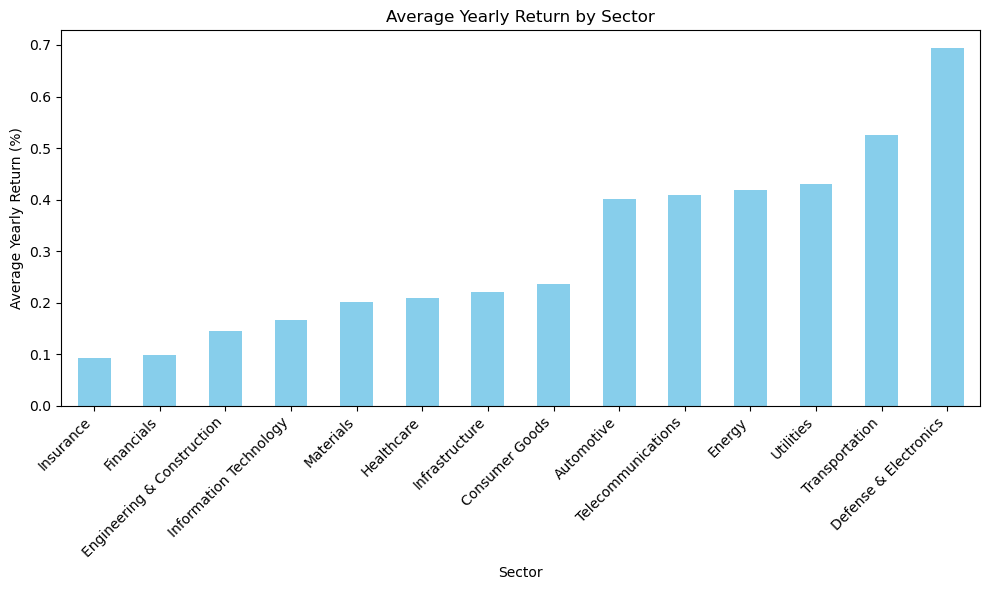

In [88]:
# Calculate average yearly return by sector
sector_performance = df.groupby('sector')['yearly_return'].mean()

# Plotting
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sector_performance.sort_values().plot(kind='bar', color='skyblue')
plt.title('Average Yearly Return by Sector')
plt.ylabel('Average Yearly Return (%)')
plt.xlabel('Sector')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


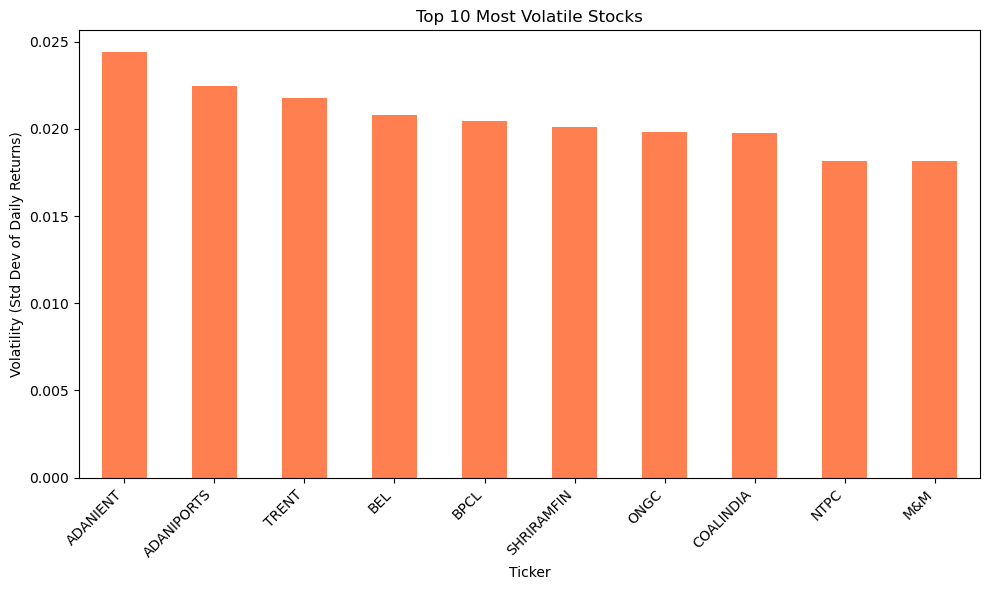

In [90]:
# Calculate volatility (standard deviation of daily returns)
volatility = df.groupby('Ticker')['daily_return'].std()

# Top 10 most volatile stocks
top_volatile_stocks = volatility.sort_values(ascending=False).head(10)

# Plotting
plt.figure(figsize=(10, 6))
top_volatile_stocks.plot(kind='bar', color='coral')
plt.title('Top 10 Most Volatile Stocks')
plt.ylabel('Volatility (Std Dev of Daily Returns)')
plt.xlabel('Ticker')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [92]:
# Count of green vs red stocks
green_stocks = len(df[df['yearly_return'] > 0])
red_stocks = len(df[df['yearly_return'] <= 0])

print(f"Green stocks: {green_stocks}, Red stocks: {red_stocks}")

# Overall averages
avg_price = df['close'].mean()
avg_volume = df['volume'].mean()

print(f"Average price: {avg_price}, Average volume: {avg_volume}")


Green stocks: 12111, Red stocks: 2089
Average price: 2449.415379577465, Average volume: 6833474.649154929


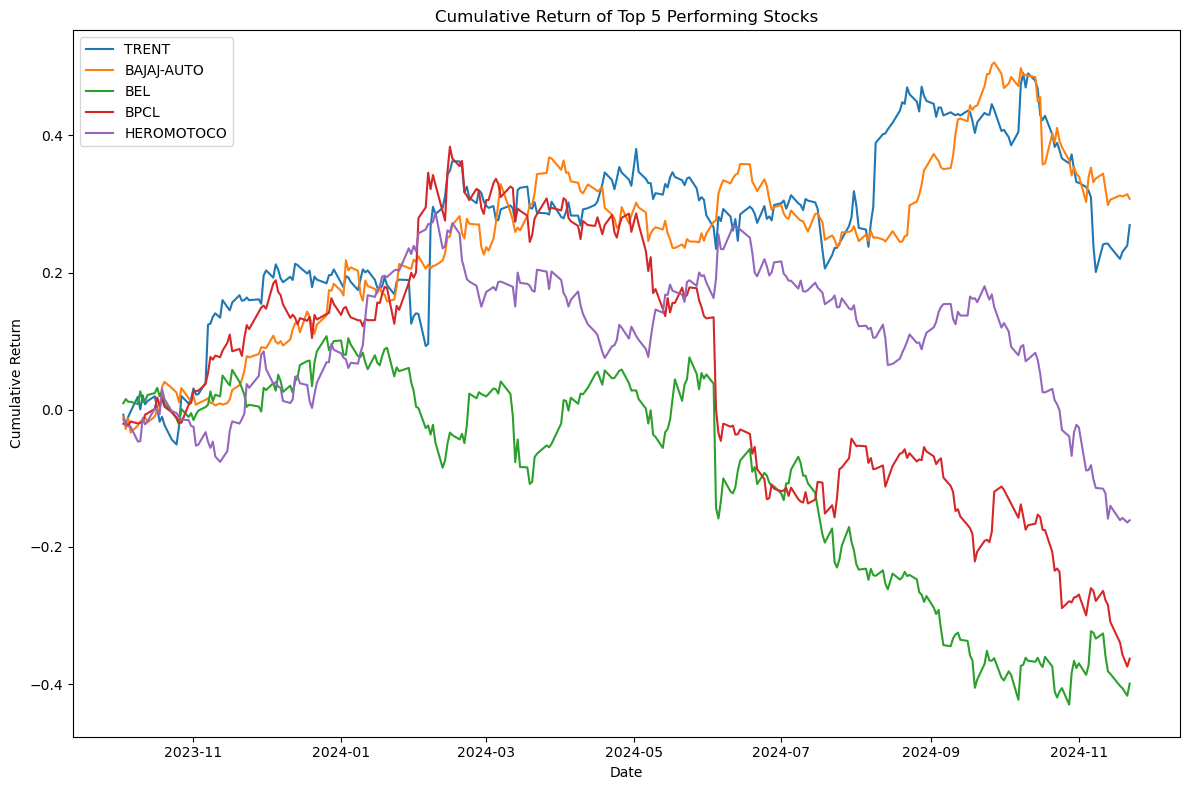

In [94]:
# Calculate cumulative return
df['cumulative_return'] = df.groupby('Ticker')['daily_return'].cumsum()

# Identify top 5 performing stocks
top_stocks = df.groupby('Ticker')['yearly_return'].sum().sort_values(ascending=False).head(5).index
top_stocks_data = df[df['Ticker'].isin(top_stocks)]

# Plotting cumulative returns
plt.figure(figsize=(12, 8))
for ticker in top_stocks:
    stock_data = top_stocks_data[top_stocks_data['Ticker'] == ticker]
    plt.plot(stock_data['stock_date'], stock_data['cumulative_return'], label=ticker)

plt.title('Cumulative Return of Top 5 Performing Stocks')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.tight_layout()
plt.show()


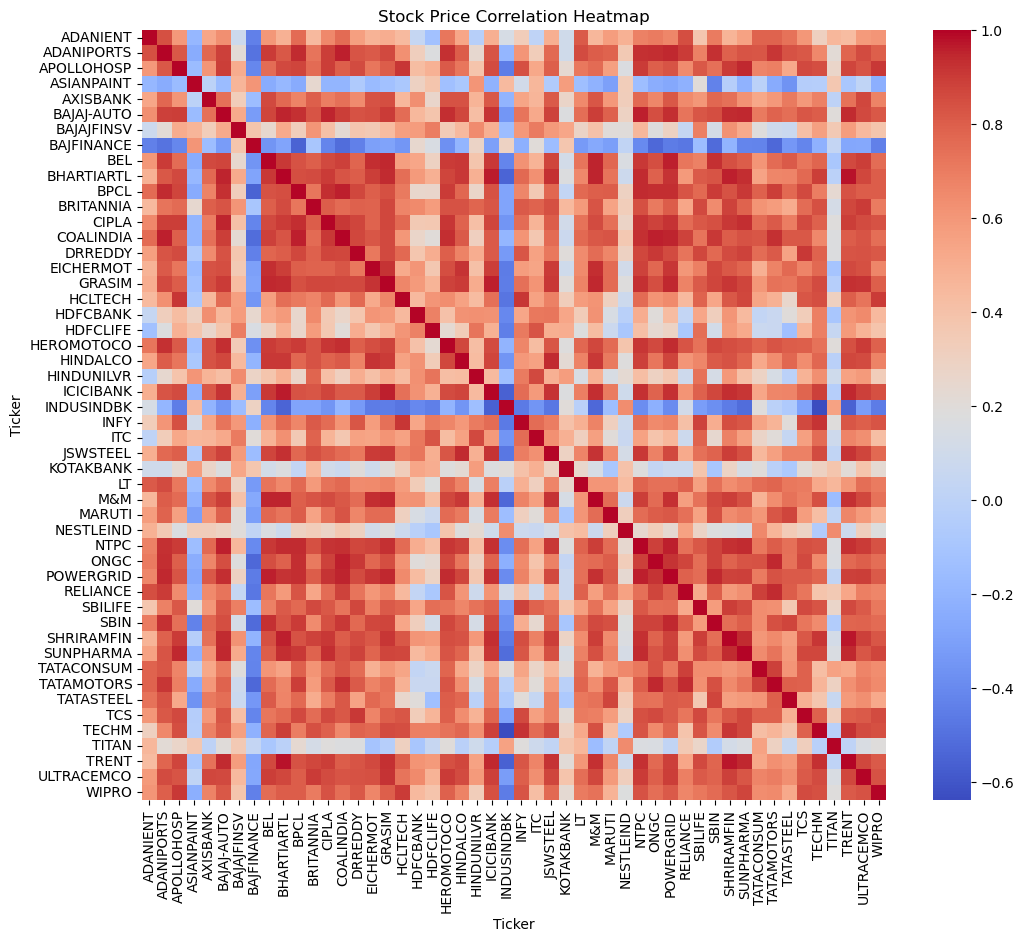

In [96]:
import seaborn as sns

# Pivot table for stock prices
price_pivot = df.pivot(index='stock_date', columns='Ticker', values='close')

# Correlation matrix
correlation_matrix = price_pivot.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Stock Price Correlation Heatmap')
plt.show()


In [98]:
import os

# Define the save path
save_path = r"D:\Project_Stock"
file_name = "processed_stock_data.csv"
full_path = os.path.join(save_path, file_name)

# Save the DataFrame to the specified path
df.to_csv(full_path, index=False)

print(f"Processed data saved successfully to {full_path}")


Processed data saved successfully to D:\Project_Stock\processed_stock_data.csv
